<a href="https://colab.research.google.com/github/philsaurabh/Machine-Learning-Tutorials/blob/main/Credit_LDA_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [68]:
import pandas as pd 
import numpy as np
import seaborn as sns

# Import dataset

In [69]:
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Machine-Learning-Tutorials/main/Credit.csv')

In [70]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,0
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [71]:
df.shape

(400, 13)

In [72]:
df.columns

Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance', 'Defaultee'],
      dtype='object')

In [73]:
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Defaultee
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.180000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.384669
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.000000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,0.000000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,0.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.000000


# Data Cleaning and Preprocessing

In [74]:
df.isnull().sum().sum()

0

In [75]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Student'] = df['Student'].map({'Yes': 1, 'No': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Ethnicity'] = df['Ethnicity'].map({'Caucasian': 1, 'Asian': 0,'African American':2})

In [76]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Defaultee
0,14.891,3606,283,2,34,11,1,0,1,1,333,0
1,106.025,6645,483,3,82,15,0,1,1,0,903,0
2,104.593,7075,514,4,71,11,1,0,0,0,580,0
3,148.924,9504,681,3,36,11,0,0,0,0,964,0
4,55.882,4897,357,2,68,16,1,0,1,1,331,0


In [77]:
df.isnull().sum().sum()
#mean_value=df['Column_name'].mean()
#df['Column_name'].fillna(value=mean_value, inplace=True)

0

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [79]:
X = df.drop(columns = ['Defaultee'])
y = df['Defaultee'].values

In [80]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [81]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

In [82]:
X

array([[-0.86158299, -0.48999879, -0.46553881, ...,  0.79539491,
         0.01058078, -0.40727698],
       [ 1.72743711,  0.82826106,  0.82870309, ...,  0.79539491,
        -1.40018942,  0.83405596],
       [ 1.68675551,  1.01478681,  1.02931059, ..., -1.25723711,
        -1.40018942,  0.13063396],
       ...,
       [ 0.35946155, -0.24491264, -0.21963285, ...,  0.79539491,
         0.01058078, -0.83194351],
       [-0.21280808, -0.95891584, -1.05441888, ...,  0.79539491,
         0.01058078, -1.13247675],
       [-0.75334493,  0.34199278,  0.38866085, ..., -1.25723711,
        -1.40018942,  0.97125591]])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 11), (80, 11), (320,), (80,))

In [85]:
from sklearn.model_selection import KFold

# Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()#KNeighborsClassifier()#SVC#RandomForestClassifier()#AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cv_score = cross_val_score(model, X_train, y_train, cv = 6)
kfold_validation=KFold(10)
k_fold =cross_val_score(model,X,y,cv=kfold_validation)
print ('Train score is', score)
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)
print ('--')
print ('CV score is', cv_score)
print(np.mean(cv_score))
print ('K fold score is', k_fold)
print(np.mean(k_fold))

Train score is 0.9375
--
Precision score is  0.7333333333333333
--
ROC Score is 0.9289215686274509
--
Recall Score is  0.9166666666666666
--
Confusion Matrix

 [[64  4]
 [ 1 11]]
--
CV score is [0.92592593 0.90740741 0.94339623 0.86792453 0.90566038 0.94339623]
0.9156184486373166
K fold score is [0.9   0.95  0.975 0.925 0.95  0.925 0.95  0.925 0.975 0.825]
0.9299999999999999


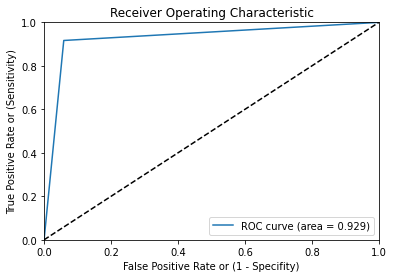

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# SVM

In [88]:
model = SVC()#KNeighborsClassifier()#SVC#RandomForestClassifier()#AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cv_score = cross_val_score(model, X_train, y_train, cv = 6)
kfold_validation=KFold(10)
k_fold =cross_val_score(model,X,y,cv=kfold_validation)
print ('Train score is', score)
print ('--')
print ('Precision score is ', precision)
print ('--')
print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)
print ('--')
print ('CV score is', cv_score)
print(np.mean(cv_score))
print ('K fold score is', k_fold)
print(np.mean(k_fold))

Train score is 0.9625
--
Precision score is  1.0
--
ROC Score is 0.875
--
Recall Score is  0.75
--
Confusion Matrix

 [[68  0]
 [ 3  9]]
--
CV score is [0.90740741 0.94444444 0.94339623 0.94339623 0.88679245 0.94339623]
0.928138830654554
K fold score is [0.925 0.975 0.975 0.975 1.    0.95  0.9   0.975 0.975 0.9  ]
0.9550000000000001


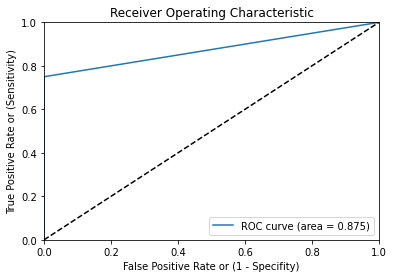

In [89]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")